# Library

In [2]:
import rospy
import jupyros as jr 
import ipywidgets as widgets
import sys
import matplotlib.pyplot as plt                                                                     
import numpy as np
from std_srvs.srv import *                                                       
from std_msgs.msg import String                                                   
from ipywidgets import Button, Output, Layout, ButtonStyle, GridBox, VBox, HBox  
from IPython.display import display                                              
from jupyros import ros3d                                                        
import os                                                                       
from nav_msgs.msg import Odometry                                                
from ipywidgets import interactive_output
from geometry_msgs.msg import Twist
from sensor_msgs.msg import LaserScan
from actionlib_msgs.msg import GoalStatusArray
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import MaxNLocator
import tf
from tf.transformations import quaternion_matrix
import time
import actionlib
from move_base_msgs.msg import MoveBaseAction, MoveBaseGoal
from tf import transformations
from matplotlib.lines import Line2D
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

# Ros node initiation

In [3]:
rospy.init_node('jupyter_node')                                                

# Robot Behaivore 

In [4]:
#Widget to choose robot behavior
RB = widgets.RadioButtons(
    options=['1.Entere coordinates','2.Driving with keyboards',
             '3.Driving & avoid obstacles' ],
#value='Entere coordinates', # Defaults to 'Entere coordinates'
#layout={'width': 'max-content'}, # If the items' names are long
    description='Choose robot behavior:',
    disabled=False
)
display(RB)

RadioButtons(description='Choose robot behavior:', options=('1.Entere coordinates', '2.Driving with keyboards'…

# Change State of Robot

In [3]:
#Use set_param to change state of robot
if RB.value == '1.Entere coordinates':
    rospy.set_param('robot_state', '1')
elif RB.value == '2.Driving with keyboards':
    rospy.set_param('robot_state', '2')
elif RB.value == '3.Driving & avoid obstacles':
    rospy.set_param('robot_state', '3')
print("robot behaviour changed to: ")
print(RB.value)

NameError: name 'RB' is not defined

# Insert Goal 

In [6]:
#jupyter ros to publish goal insert by user
print("Insert coordinate in format x,y:\n")
jr.publish('/movebase_client_goal', String)

Insert coordinate in format x,y:



# Driving with keyboards

In [9]:
#Define different keys to guide robots
in1 = Button(description='u',layout=Layout(width='auto', grid_area='in1'),style=ButtonStyle(button_color='olive'))
out1 = Output()
in2 = Button(description='j',layout=Layout(width='auto', grid_area='in2'),style=ButtonStyle(button_color='olive'))
out2 = Output()
in3 = Button(description='m',layout=Layout(width='auto', grid_area='in3'),style=ButtonStyle(button_color='olive'))
out3 = Output()
in4 = Button(description='i',layout=Layout(width='auto', grid_area='in4'),style=ButtonStyle(button_color='olive'))
out4 = Output()
in5 = Button(description='k',layout=Layout(width='auto', grid_area='in5'),style=ButtonStyle(button_color='olive'))
out5 = Output()
in6 = Button(description=',',layout=Layout(width='auto', grid_area='in6'),style=ButtonStyle(button_color='olive'))
out6 = Output()
in7 = Button(description='o',layout=Layout(width='auto', grid_area='in7'),style=ButtonStyle(button_color='olive'))
out7 = Output()
in8 = Button(description='l',layout=Layout(width='auto', grid_area='in8'),style=ButtonStyle(button_color='olive'))
out8 = Output()
in9 = Button(description='.',layout=Layout(width='auto', grid_area='in9'),style=ButtonStyle(button_color='olive'))
out9 = Output()

def on_button_clicked1(in1):
    with out1:
        pub.publish('u')
def on_button_clicked2(in2):
    with out2:
        pub.publish('j')
def on_button_clicked3(in3):
    with out3:
        pub.publish('m')
def on_button_clicked4(in4):
    with out4:
        pub.publish('i')
def on_button_clicked5(in5):
    with out5:
        pub.publish('k')
def on_button_clicked6(in6):
    with out6:
        pub.publish(',')
def on_button_clicked7(in7):
    with out7:
        pub.publish('o')
def on_button_clicked8(in8):
    with out8:
        pub.publish('l')
def on_button_clicked9(in9):
    with out9:
        pub.publish('.')
        
in1.on_click(on_button_clicked1)
in2.on_click(on_button_clicked2)
in3.on_click(on_button_clicked3)
in4.on_click(on_button_clicked4)
in5.on_click(on_button_clicked5)
in6.on_click(on_button_clicked6)
in7.on_click(on_button_clicked7)
in8.on_click(on_button_clicked8)
in9.on_click(on_button_clicked9)

pub = rospy.Publisher('/teleop_input_key', String, queue_size=10)
print("input direction:")
HBox([VBox([in1, in2, in3]),VBox([in4, in5, in6]),VBox([in7, in8, in9])])


input direction:


# Control Velocity


In [10]:
#jupyter ros to publish velocity choose by user
jr.publish('/cmd_vel', Twist)

# Angular & Linear Velocity Viewer

<IPython.core.display.Javascript object>


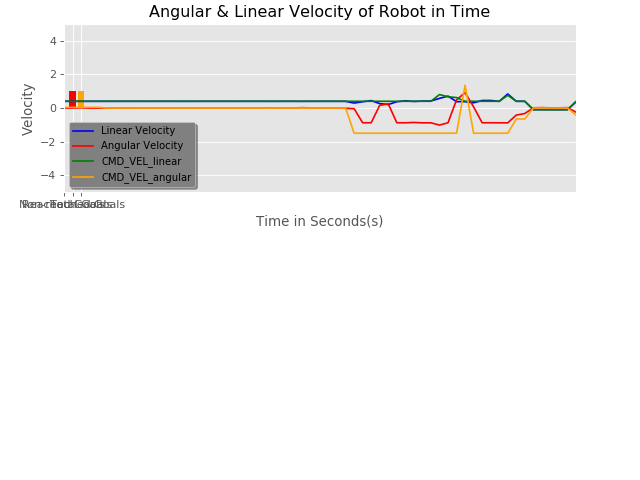

In [8]:
class VelocityAnalysis:

    def __init__(self):
        
        # Initial action plot to print figure
        self.fig = plt.figure(figsize=(8,6))
        self.ax = self.fig.add_axes([0.1, 0.6, 0.8, 0.35])
        self.line1 = Line2D([], [],color='blue', label='Linear Velocity')
        self.line2 = Line2D([], [],color='red', label='Angular Velocity')
        self.line3 = Line2D([], [],color='green', label='CMD_VEL_linear')
        self.line4 = Line2D([], [],color='orange', label='CMD_VEL_angular')

        # Add the lines to the axis 
        self.ax.add_line(self.line1)
        self.ax.add_line(self.line2)
        self.ax.add_line(self.line3)
        self.ax.add_line(self.line4)

        # Initialize data list
        self.vel1, self.vel11 = [], 0
        self.vel2, self.vel21 = [], 0            
        self.vel3, self.vel31 = [], 0            
        self.vel4, self.vel41 = [], 0
        self.count, self.count1 = [], 0


    def plot_init(self):
        
        #Labels 
        self.ax.set_ylim(-5.0, 5.0)
        self.ax.set_xlim(0, 60)
        self.ax.set_title('Angular & Linear Velocity of Robot in Time')
        self.ax.set_ylabel('Velocity')
        self.ax.set_xlabel('Time in Seconds(s)')
        self.ax.legend(shadow=True, facecolor='gray', fontsize=9)
        return self.line1, self.line2, self.line3, self.line4

    def odom_callback(self, msg):
        
        #Get odometry data via subscribe
        self.vel11 = msg.twist.twist.linear.x
        self.vel21 = msg.twist.twist.angular.z

    def cmd_callback(self, msg):
        
        #Get cmd_velocity data via subscribe
        self.vel31 = msg.linear.x
        self.vel41 = msg.angular.z

    def update_plot(self, frame):
          
        #Update plot
        self.vel1.append(self.vel11)
        self.vel2.append(self.vel21)
        self.vel3.append(self.vel31)
        self.vel4.append(self.vel41)
        self.count.append(self.count1)
        self.count1 += 1
        if (len(self.count) > 60):
            
            # This for updating the limits of the axes to accomodate the new size of the plot list value
            # also the list size is cut to the size of data that would be displayed on the plot. 
            time_len = self.count1 #len(self.count)
            x_lim = time_len - 60
            self.ax1.set_xlim(x_lim, (60 + x_lim))
            self.vel1 = self.vel1[-60:]
            self.vel2 = self.vel2[-60:]
            self.vel3 = self.vel3[-60:]
            self.vel4 = self.vel4[-60:]
            self.count = self.count[-60:]
            
        self.line1.set_data(self.count, self.vel1)
        self.line2.set_data(self.count, self.vel2)
        self.line3.set_data(self.count, self.vel3)
        self.line4.set_data(self.count, self.vel4)
        return self.line1, self.line2, self.line3, self.line4

#Creating an instance of the Visualiser class
vel_analysis = VelocityAnalysis()

#Subscribe
sub2 = rospy.Subscriber('/cmd_vel', Twist, vel_analysis.cmd_callback)
sub3 = rospy.Subscriber('/odom', Odometry, vel_analysis.odom_callback)

#Animation function to update plot
anim = FuncAnimation(vel_analysis.fig, vel_analysis.update_plot, init_func=vel_analysis.plot_init, blit=True, interval=500)

#Plot output
plt.show(block=True)

# 3D Viwer

In [11]:
#Environment similar to Rviz to view robot status
v = ros3d.Viewer()
rc = ros3d.ROSConnection(url="ws://localhost:9090")
tf_client = ros3d.TFClient(ros=rc, fixed_frame='map')
laser_view = ros3d.LaserScan(topic="/scan", ros=rc, tf_client=tf_client)
map_view = ros3d.OccupancyGrid(topic="/map", ros=rc, tf_client=tf_client)
path = ros3d.Path(topic="/move_base/NavfnROS/plan", ros=rc,
tf_client=tf_client)
urdf = ros3d.URDFModel(ros=rc, tf_client=tf_client,
path=os.environ.get('JUPYROS_ASSETS_URL', 'http://localhost:3000'))
g = ros3d.GridModel()
v.objects = [g, laser_view, map_view, path, urdf]
v

Viewer(objects=[GridModel(), LaserScan(ros=ROSConnection(url='ws://localhost:9090'), tf_client=TFClient(fixed_…

# Lascer Range

<IPython.core.display.Javascript object>


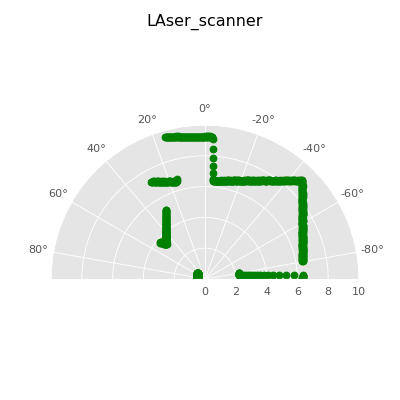

Text(0.5, 1.05, 'LAser_scanner')

In [6]:
class Laser_Visualiser:
    def __init__(self):
        
        #Build blank arrays for laser and angle data
        self.laser  = []  
        self.angles = []
        #Initial action plot to print figure
        plt.style.use('ggplot')
        self.fig_laser = plt.figure(figsize=(5,5))
        self.ax_laser = plt.subplot(polar=True)
        self.ax_laser.set_thetalim(-np.pi/2,np.pi/2)
        self.ax_laser.set_theta_zero_location("N")
        self.ln_laser, = self.ax_laser.plot([],[],'go')
    def plot_init(self):
        
        #Labels 
        self.ax_laser.set_title("Laser_scanner")
        self.ax_laser.set_ylabel("Distance to obstacles",fontweight="bold")
        
        return self.ln_laser
    
    def scan_callback(self, msg):
        
        #Get Laser_scanner Data via subscribe
        self.angles = list(np.arange(msg.angle_min, msg.angle_max+msg.angle_increment, msg.angle_increment))
        self.laser=list(msg.ranges)
        
    def update_polar(self, frame):  
        
        #Update plot
        #MAX radios range
        self.ax_laser.set_rmax(10)
        self.ln_laser.set_data(self.angles,self.laser)
        return self.ln_laser
    
#Creating an instance of the Visualiser class
vis = Laser_Visualiser()

#Subscriber
sub_scan = rospy.Subscriber("/scan", LaserScan, vis.scan_callback)

#Animating function to update plot
ani_laser = FuncAnimation(vis.fig_laser, vis.update_polar, blit = True)

#Plot output
plt.show(block = True)
plt.title("LAser_scanner")


# 2D plot patch follow

<IPython.core.display.Javascript object>


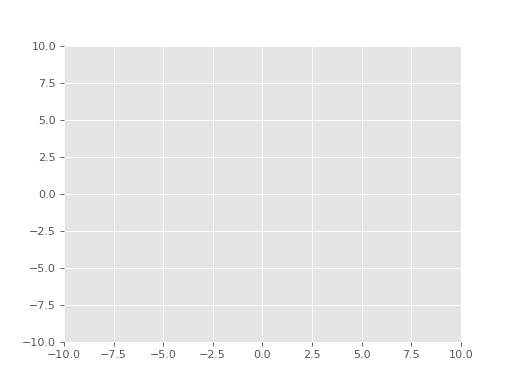

Text(0.5, 1.0, 'Odometry')

In [5]:
#Define primary instruction to print 2D robot stroke
class Odometry_Visualiser:
    
    def __init__(self):
        
        #Initial action plot to print figure
        plt.style.use('ggplot')
        self.fig, self.ax = plt.subplots()
        self.ln, = plt.plot([], [], 'go')
        #Build blank arrays for x and y data
        self.x_data, self.y_data = [] , []
        

    def plot_init(self):
        
        #Plot limitation 
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)
        return self.ln

    def odom_callback(self, msg):
        
        #Get omdometry data via subscribe
        self.y_data.append(msg.pose.pose.position.y)
        self.x_data.append(msg.pose.pose.position.x)

    def update_plot(self, frame):
        
        #Update path follow of robot
        self.ln.set_data(self.x_data, self.y_data)
        return self.ln

#Creating an instance of the Visualiser class
vis = Odometry_Visualiser()

#Subscriber 
sub = rospy.Subscriber('/odom', Odometry, vis.odom_callback)

#Animating function to update plot
ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init,blit=True)

#Plot output
plt.show(block=True)
plt.title("Odometry")

# Goal Status

<IPython.core.display.Javascript object>


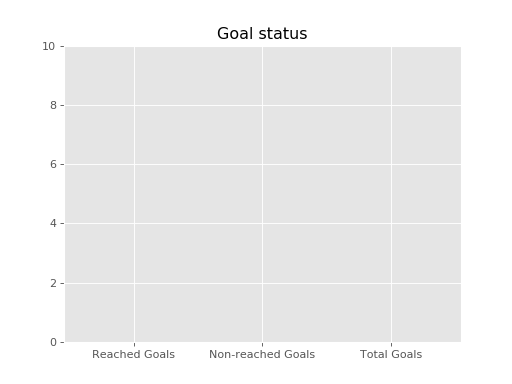

Text(0.5, 1.0, 'Goal status')

In [7]:
class Goal_Visualiser:
    
    def __init__(self):
        
        #Initial action plot to print Goal status
        self.achieved = False
        self.goal_counter = 0
        self.non_reached_goal_counter = 0
        #Build blank arrays for x and y data
        self.x_pos, self.y_pos = [], []
        self.fig_target, self.ax_target = plt.subplots()
        plt.grid(True)
        self.status_list = [0, 0]
        self.data = {'Reached Goals': self.goal_counter, 
                     'Non-reached Goals':self.non_reached_goal_counter, 
                     'Total Goals': self.goal_counter + self.non_reached_goal_counter}
        
        self.target = list(self.data.keys())
        self.values = list(self.data.values())
        self.ln_target = plt.bar(self.target, self.values, color=("green", "red", "orange"))
        
              
    def plot_init(self):
        
        #Plot limitation
        self.ax_target.set_ylim(0, 10)
        return self.ln_target
            
    def goal_cb(self, msg): 
        
        #Get Goal's status via subscribe
        try: 
            self.status_list.append(msg.status_list[0].status)
            
            if self.status_list[-1] == 3 and self.status_list[-2] != 3:
                self.goal_counter = self.goal_counter + 1

            elif self.status_list[-1] == 2 and self.status_list[-2] != 2:
                self.non_reached_goal_counter = self.non_reached_goal_counter + 1

            elif self.status_list[-1] == 4 and self.status_list[-2] != 2:
                self.non_reached_goal_counter = self.non_reached_goal_counter + 1

        except IndexError:
            pass
    
    def update_plot_target(self, frame):
        
        # Update barplot
        x = self.goal_counter
        y = self.non_reached_goal_counter
        z = self.goal_counter + self.non_reached_goal_counter
        self.updated_data = {'Reached Goals': x, 
                             'Non-reached Goals': y, 
                             'Total Goals': z}
        
        h = list(self.updated_data.values())
        q = list(self.updated_data.keys())
        self.ln_target = plt.bar(q, h, color=("green", "red", "orange"))
        return self.ln_target
    
#Creating an instance of the Visualiser class
vis = Goal_Visualiser()

# Subscribe
sub_status = rospy.Subscriber("/move_base/status", GoalStatusArray, vis.goal_cb)

#Animating function to update barplot
ani_target = FuncAnimation(vis.fig_target, vis.update_plot_target, init_func=vis.plot_init, interval=100)

#Plot
plt.show(block = True)
plt.title("Goal status")